In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('tested.csv')

In [3]:
# Basic information
print("Basic Info:")
data.info()

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
# Statistical Summary
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


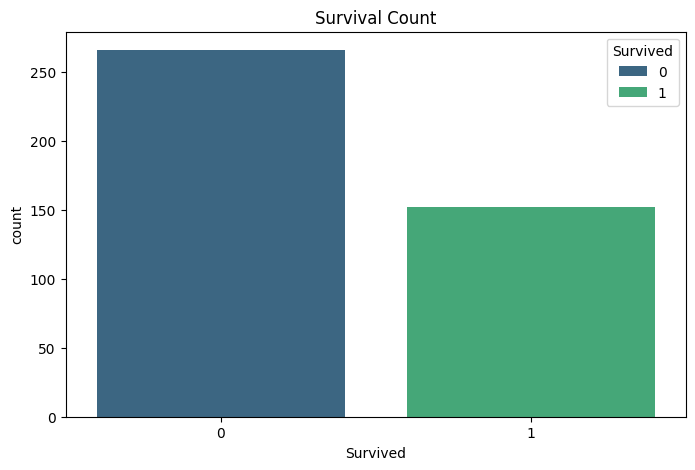

In [12]:
# Visualization: Survival Count
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=data, hue='Survived', palette='viridis')
plt.title('Survival Count')
plt.show()


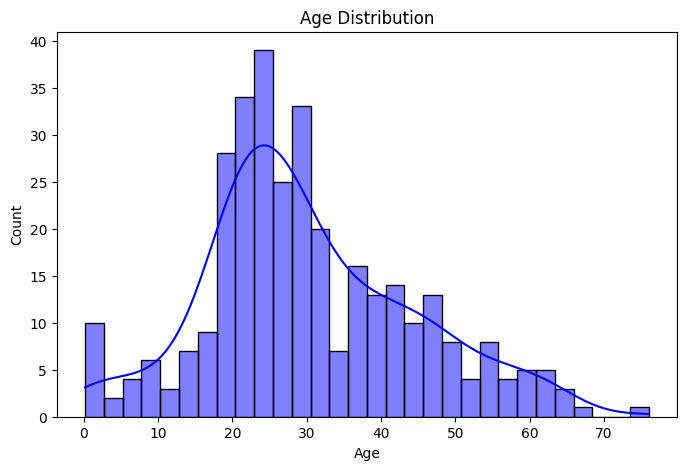

In [7]:
# Visualization: Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.show()

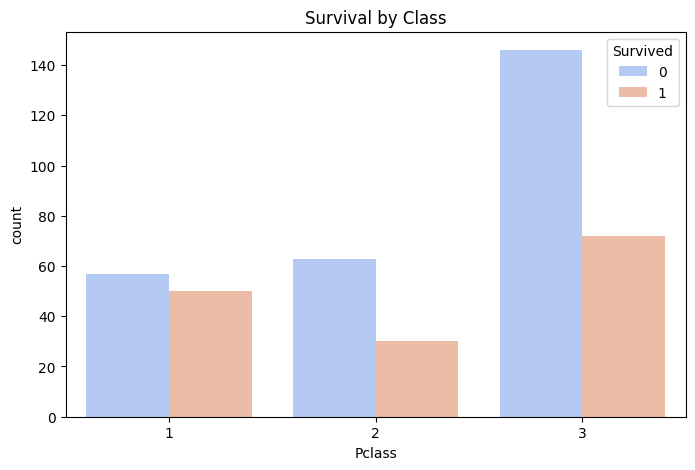

In [8]:
# Visualization: Survival by Class
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='coolwarm')
plt.title('Survival by Class')
plt.show()


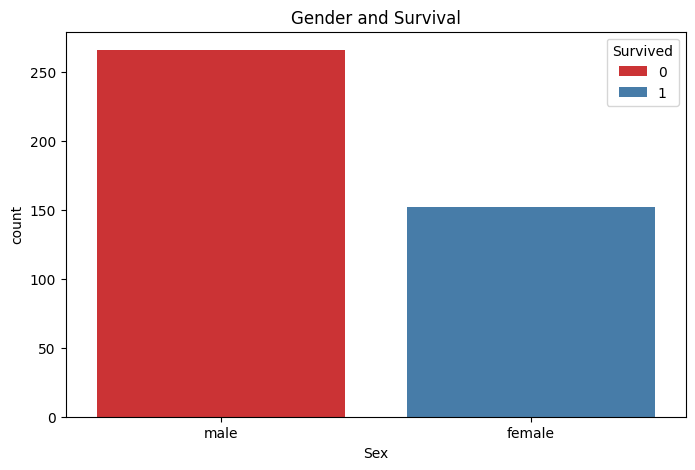

In [9]:
# Visualization: Gender and Survival
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=data, palette='Set1')
plt.title('Gender and Survival')
plt.show()

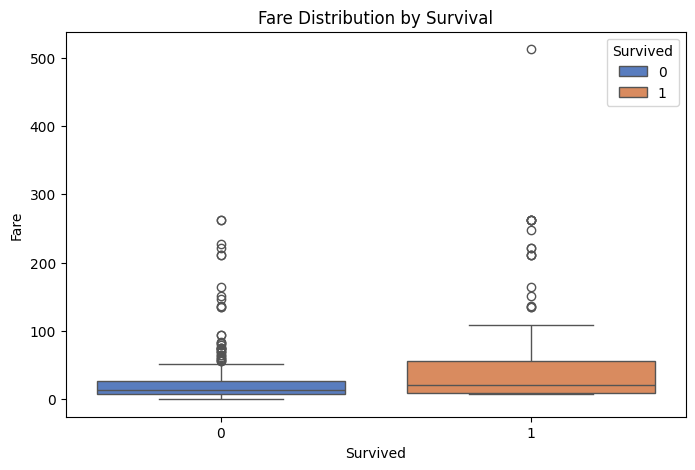

In [11]:
# Visualization: Fare Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=data, hue='Survived', palette='muted')
plt.title('Fare Distribution by Survival')
plt.show()


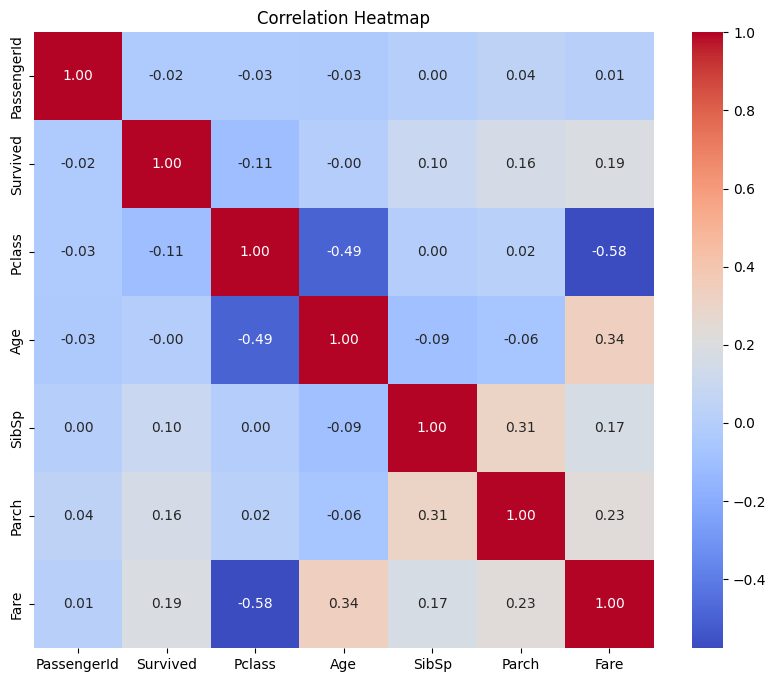

In [15]:
# Drop non-numeric columns, like 'Sex' or others that are not relevant for correlation
data_clean = data.select_dtypes(include=['number'])

# Compute and plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()




In [17]:
# Handling Missing Values
# Fill Age with median
median_age = data['Age'].median()
data['Age'] = data['Age'].fillna(median_age)


In [18]:
# Drop Cabin (too many missing values)
data.drop(columns=['Cabin'], inplace=True)

In [20]:
# Fill Fare with median

median_fare = data['Fare'].median()
data['Fare'] = data['Fare'].fillna(median_fare)


In [21]:
# Missing Values after handling
print("\nMissing Values after handling:")
print(data.isnull().sum())


Missing Values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [22]:
# Save the cleaned dataset for further use
data.to_csv('data/cleaned_tested.csv', index=False)